# BUSINESS UNDERSTANDING
---

# PROBLEM STATEMENT

# OBJECTIVES

# DATA UNDERSTANDING

## 1. Import the necessary libaries

## 2. Data Loading
Load the images from both folders using a data generator

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to your image folders
no_aug_dir = 'Plant_leave_diseases_dataset_without_augmentation'
aug_dir = 'Plant_leave_diseases_dataset_with_augmentation'

# Data generators for loading images
no_aug_datagen = ImageDataGenerator(rescale=1./255)
aug_datagen = ImageDataGenerator(rescale=1./255)

no_aug_generator = no_aug_datagen.flow_from_directory(
    no_aug_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

aug_generator = aug_datagen.flow_from_directory(
    aug_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 55442 images belonging to 39 classes.
Found 61480 images belonging to 39 classes.


## 3. Data Cleaning

### 3.1 Remove Corrupt Images
Check for and remove any corrupt or unreadable images.

In [4]:
import os
from PIL import Image

def check_corrupt_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                file_path = os.path.join(root, file)
                try:
                    # Attempt to open the image and verify it
                    with Image.open(file_path) as img:
                        img.verify()  # Verify that it is not corrupt
                except (IOError, SyntaxError) as e:
                    print(f'Corrupt image detected and removed: {file_path}')
                    os.remove(file_path)  # Remove the corrupt image

In [5]:
# Run the function on your directories

In [6]:
check_corrupt_images(no_aug_dir)

In [7]:
check_corrupt_images(aug_dir)

**There are no corrupt images in our dataset**

### 3.2 Remove Duplicates
Detect and remove any duplicate images.

In [8]:
import hashlib

def find_duplicate_images(directory):
    hash_set = set()
    duplicates = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                file_path = os.path.join(root, file)
                with open(file_path, 'rb') as f:
                    file_hash = hashlib.md5(f.read()).hexdigest()
                    if file_hash in hash_set:
                        print(f'Duplicate found: {file_path}')
                        duplicates.append(file_path)
                    else:
                        hash_set.add(file_hash)

    for file_path in duplicates:
        os.remove(file_path)  # Remove duplicate images


In [9]:
find_duplicate_images(no_aug_dir)


In [10]:
find_duplicate_images(aug_dir)

**There are no duplicates**

### 3.3 Standardize Image Sizes
Ensure all images are the same size, as required by most models.

In [11]:
from PIL import Image
import os

def resize_images(directory, target_size=(224, 224)):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                file_path = os.path.join(root, file)
                img = Image.open(file_path)
                img = img.resize(target_size)
                img.save(file_path)  # Overwrite with the resized image

In [12]:
resize_images(no_aug_dir)

In [13]:
resize_images(aug_dir)

### 3.5 Image Enhancement
Improve image quality with filters or contrast adjustments.

In [14]:
from PIL import ImageEnhance

def enhance_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                file_path = os.path.join(root, file)
                img = Image.open(file_path)
                enhancer = ImageEnhance.Contrast(img)
                img = enhancer.enhance(1.5)  # Increase contrast
                img.save(file_path)

In [15]:
enhance_images(no_aug_dir)

In [16]:
enhance_images(aug_dir)

## 4. Exploratory Data Analysis (EDA)

### 4.1 Univariate Analysis
Check the distribution of images across different classes.

In [36]:
import matplotlib.pyplot as plt
import os

def plot_class_distribution(directory):
    class_counts = {}
    
    for root, dirs, files in os.walk(directory):
        if len(files) > 0:
            class_name = os.path.basename(root)
            class_counts[class_name] = len(files)
    
    # Plotting
    plt.figure(figsize=(12, 8))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()  # Adjust layout to fit labels and title
    plt.show()


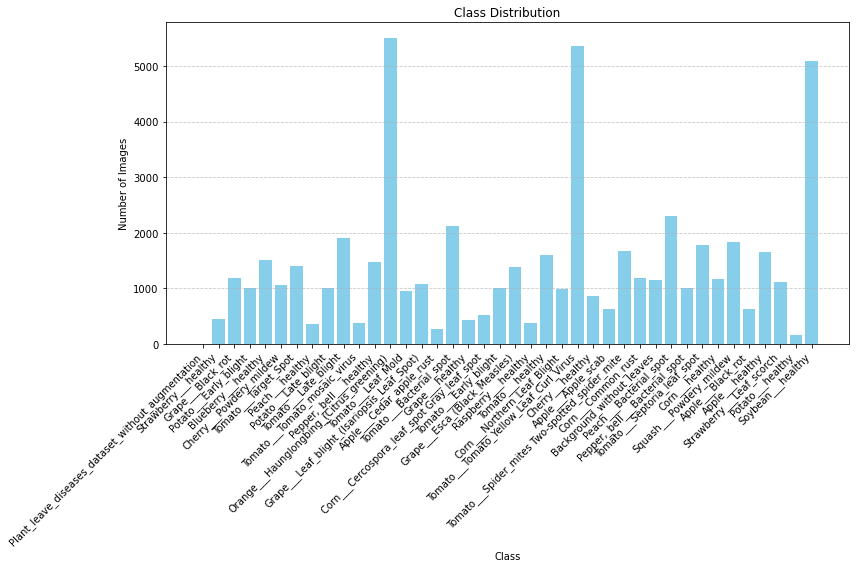

In [37]:
plot_class_distribution(no_aug_dir)

**Observations**

- The dataset with plants without augmentation exhibits significant class imbalance. 
- Classes like `Tomato Bacterial Spot` and `Potato healthy` are overrepresented, while others, such as `Early blight`, `Apple scab` and `Cedar apple rust` are underrepresented.
- This imbalance may affect model performance.

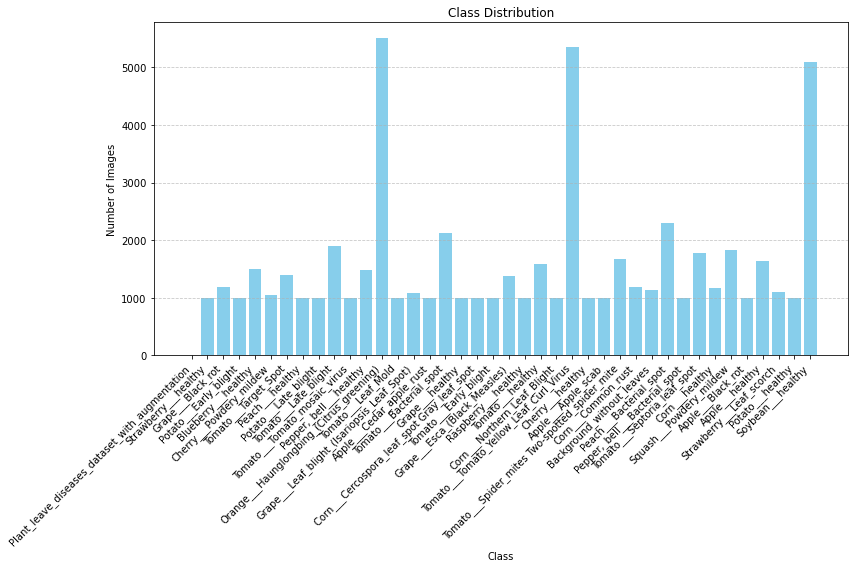

In [39]:
plot_class_distribution(aug_dir)

**Observations**

- The dataset with plants with augmntation shows the same results as the one with plants without augmentation. 

### 4.2 Visualize Sample Images

Display a few images from each class to understand the dataset.

In [62]:
import matplotlib.pyplot as plt
import os
from PIL import Image

def visualize_images_from_folder(folder_path, num_images=10):
    # Ensure the folder exists
    if not os.path.exists(folder_path):
        print(f"Folder does not exist: {folder_path}")
        return
    
    # List all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    # Check if there are images available
    if len(image_files) == 0:
        print(f"No images found in {folder_path}")
        return
    
    # Limit to the specified number of images
    image_files = image_files[:num_images]
    
    plt.figure(figsize=(15, 15))
    
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)
        try:
            img = Image.open(image_path)
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.axis('off')
        except Exception as e:
            print(f"Could not open image {image_path}: {e}")
    
    plt.tight_layout()
    plt.show()


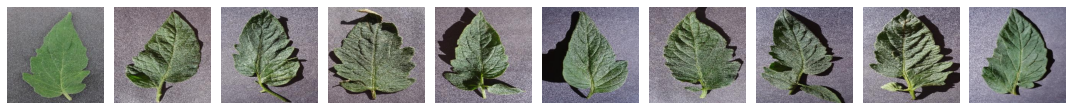

In [70]:
visualize_images_from_folder('Plant_leave_diseases_dataset_without_augmentation/Tomato___Healthy'  )

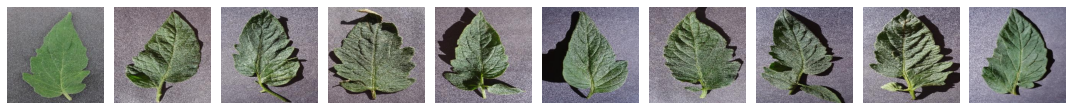

In [71]:
visualize_images_from_folder('Plant_leave_diseases_dataset_with_augmentation/Tomato___Healthy'  )

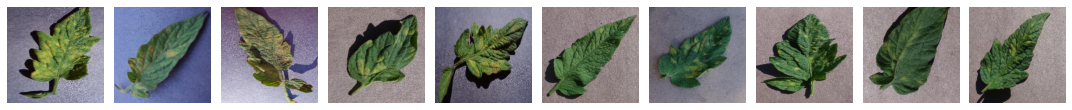

In [72]:
visualize_images_from_folder('Plant_leave_diseases_dataset_with_augmentation/Tomato___Leaf_Mold')

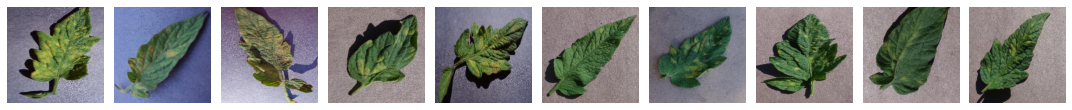

In [73]:
visualize_images_from_folder('Plant_leave_diseases_dataset_without_augmentation/Tomato___Leaf_Mold')

**Observation**

- From the above images there is no distinction based on the folders with augmentation and those without.

Image Sizes: Analyze and standardize image sizes.

### MODELING: Handle Class Imbalances
* **Oversampling:** Increase the number of images in underrepresented classes by duplicating them.
* **Undersampling:** Reduce the number of images in overrepresented classes.
* **Synthetic Data:** Generate synthetic images using techniques like data augmentation.

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# import numpy as np
# import cv2

# def balance_classes(images, labels):
#     # This assumes you have a way to load and reshape images and labels
#     X = np.array([cv2.resize(cv2.imread(img), (224, 224)) for img in images])
#     y = np.array(labels)
    
#     ros = RandomOverSampler()
#     X_resampled, y_resampled = ros.fit_resample(X.reshape(X.shape[0], -1), y)
    
#     # Save or use X_resampled and y_resampled as needed
#     return X_resampled, y_resampled
